# NYC Airbnb Data Insights & Analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from shapely.geometry import Point, MultiPoint, Polygon
import geopandas
import folium

## Data Preprocessing & Cleaning

In [25]:
airbnb = pd.read_csv('NYC_Airbnb.csv')
airbnb.head()

/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_20149/2472506604.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('NYC_Airbnb.csv')


id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20220603182654   2022-06-04   
1  5121  https://www.airbnb.com/rooms/5121  20220603182654   2022-06-04   
2  5136  https://www.airbnb.com/rooms/5136  20220603182654   2022-06-04   
3  5178  https://www.airbnb.com/rooms/5178  20220603182654   2022-06-04   
4  5203  https://www.airbnb.com/rooms/5203  20220603182654   2022-06-03   

                                       name  \
0                     Skylit Midtown Castle   
1                           BlissArtsSpace!   
2  Spacious Brooklyn Duplex, Patio + Garden   
3          Large Furnished Room Near B'way　   
4        Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  One room available for rent in a 2 bedroom apt...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1                                                NaN   
2                                                NaN   
3    Theater district, many restaurants around here.   
4  Our neighborhood is full of restaurants and ca...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
2  https://a0.muscache.com/pictures/miso/Hosting-...     7378   
3  https://a0.muscache.com/pictures/12065/f070997...     8967   
4  https://a0.muscache.com/pictures/103776/b37157...     7490   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        4.79   
1  https://www.airbnb.com/users/show/7356  ...                        4.91   
2  https://www.airbnb.com/users/show/7378  ...                        5.00   
3  https://www.airbnb.com/users/show/8967  ...                        4.44   
4  https://www.airbnb.com/users/show/7490  ...                        4.95   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.86                4.41     NaN                f   
1                   4.47                4.52     NaN                f   
2                   4.50                5.00     NaN                f   
3                   4.87                4.39     NaN                f   
4                   4.94                4.92     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              3                                           3   
1                              2                                           0   
2                              1                                           1   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            2   
2                                            0   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.31  
1                                           0              0.32  
2                                           0              0.02  
3                                           0              3.37  
4                                           0              0.76  

[5 rows x 74 columns]

In [26]:
# filter listings
cols = ['id', 'listing_url', 'name', 'latitude', 'longitude', 'last_scraped','host_id', 'host_name', 'host_listings_count', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
nyc = airbnb[cols]

# convert price to float type
nyc['price'] = nyc['price'].str.replace('$', '').str.replace(',', '').astype(float)

print(nyc.columns)


Index(['id', 'listing_url', 'name', 'latitude', 'longitude', 'last_scraped',
       'host_id', 'host_name', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_20149/3867041645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['price'] = nyc['price'].str.replace('$', '').str.replace(',', '').astype(float)


## Data Visualizations

### Choropleth Map of NYC Neighborhoods


In [27]:
# add shapely points to the nyc dataset
nyc_geo = nyc.copy()
nyc_geo['geometry'] = [Point(xy) for xy in zip(nyc['longitude'],
                                                 nyc['latitude'])]
nyc_geo = geopandas.GeoDataFrame(nyc_geo)
nyc_geo.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            37410 non-null  int64   
 1   listing_url                   37410 non-null  object  
 2   name                          37396 non-null  object  
 3   latitude                      37410 non-null  float64 
 4   longitude                     37410 non-null  float64 
 5   last_scraped                  37410 non-null  object  
 6   host_id                       37410 non-null  int64   
 7   host_name                     37344 non-null  object  
 8   host_listings_count           37344 non-null  float64 
 9   neighbourhood_cleansed        37410 non-null  object  
 10  neighbourhood_group_cleansed  37410 non-null  object  
 11  room_type                     37410 non-null  object  
 12  accommodates                  37410 no

In [28]:
# Group by neighbourhood and calculate average price and review score
grouped = nyc_geo.groupby('neighbourhood_cleansed').agg({'price': 'mean', 'review_scores_rating': 'mean'})

# Merge the aggregated data with the original geometry data
merged_gdf = nyc_geo.merge(grouped, left_on='neighbourhood_cleansed', right_index=True)

# Create a list to store the polygons
polygons = []

# Iterate over groups
for neighbourhood_cleansed, group in merged_gdf.groupby('neighbourhood_cleansed'):
    # Combine points into a MultiPoint
    multi_point = MultiPoint(list(group['geometry']))
    # Create a convex hull polygon
    polygon = multi_point.convex_hull
    # Add neighbourhood, average price, and average review score information to the polygon
    polygon = geopandas.GeoDataFrame({
        'Neighborhood': [neighbourhood_cleansed],
        'Average Price': [group['price_y'].mean().round(2)], 
        'Average Review Score': [group['review_scores_rating_y'].mean()], 
        'geometry': [polygon]
    })
    polygons.append(polygon)

# Combine polygons into one GeoDataFrame
neighborhood_polygons = pd.concat(polygons, ignore_index=True)

# explore
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles='OpenStreetMap')

neighborhood_polygons.explore(
    m=m,
    column='Average Price',
    cmap='inferno',
    tooltip=['Neighborhood'],
    popup=['Neighborhood', 'Average Price', 'Average Review Score'],
    legend=True,
    name='Neighborhoods'
)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>Average Prices and Review Scores of Airbnbs in Different NYC Neighborhoods</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))
folium.LayerControl().add_to(m)
m
# m.save('chloropleth.html')


In this chloropleth map showcasing NYC's Airbnb landscape, we've utilized Shapely points to pinpoint the precise locations of listings within the dataset. By organizing listings according to neighborhood, we offer insightful average prices and review scores for each area. Employing convex hull polygons, we outline the geographic boundaries of these neighborhoods, enhancing them with important details such as average price and review score. The color scheme intuitively represents the relative average price of each neighborhood, enabling users to swiftly identify areas within their budget. Hovering over the polygons reveals the names of neighborhoods, while clicking provides comprehensive averages for price and review scores. This interactive feature allows potential customers to identify neighborhoods that fit their budget and review score standards, facilitating informed decision-making.

Generally, the majority of neighborhoods in NYC offer prices below $250 per night, though a few, such as Tribeca and Prospect Park, boast average prices of $559.38 and $501.50 per night, respectively. Additionally, the average review scores tend to be consistently high, with most neighborhoods receiving scores above 4.5. The interactive map provides users with the opportunity to explore the distribution of prices and review scores across NYC neighborhoods, empowering them to make well-informed decisions about where to stay according to their preferences and budget constraints.

### Bar Chart: Average Price by Room Type and Neighborhood

<Figure size 1200x600 with 0 Axes>

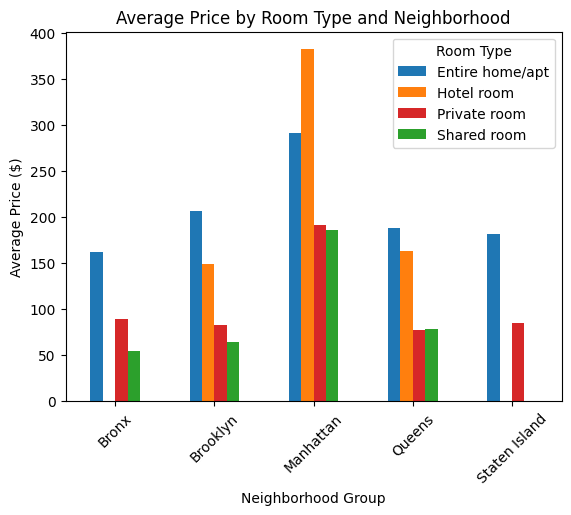

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table to summarize the data
price_by_room_neighborhood = nyc.pivot_table(index='neighbourhood_group_cleansed', columns='room_type', values='price', aggfunc='mean')

# Define the color mapping
color_dict = {'Private room': '#d62728', 'Shared room': '#2ca02c', 'Hotel room': '#ff7f0e', 'Entire home/apt': '#1f77b4'}

# Plot the bar chart
plt.figure(figsize=(12, 6))
price_by_room_neighborhood.plot(kind='bar', rot=45, color=[color_dict[i] for i in price_by_room_neighborhood.columns])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.title('Average Price by Room Type and Neighborhood')
plt.legend(title='Room Type')


The bar chart illustrates the average prices of various room types across neighborhoods in New York City, providing customers with valuable insights for their accommodation choices. It underscores significant price discrepancies among neighborhoods and offers clarity on the most popular room types in each area. Each bar represents the average price of a specific room type within a neighborhood, serving as visual cues that highlight price disparities among neighborhoods. The x-axis indicates different neighborhoods, organizing the data spatially, while the y-axis represents average prices, facilitating comparisons across room types and neighborhoods. This visual representation enables customers to easily pinpoint budget-friendly options and grasp market trends, empowering them to make well-informed decisions tailored to their preferences and budget constraints during their stay in New York City.

The bar chart vividly illustrates that Manhattan boasts the highest average price across all room types, particularly for hotel rooms. This observation highlights Manhattan's premium status in the accommodation market and highlights the significant price discrepancy between this borough and others in New York City.

### Heatmap: Distribution of Room Types Across NYC Neighborhoods


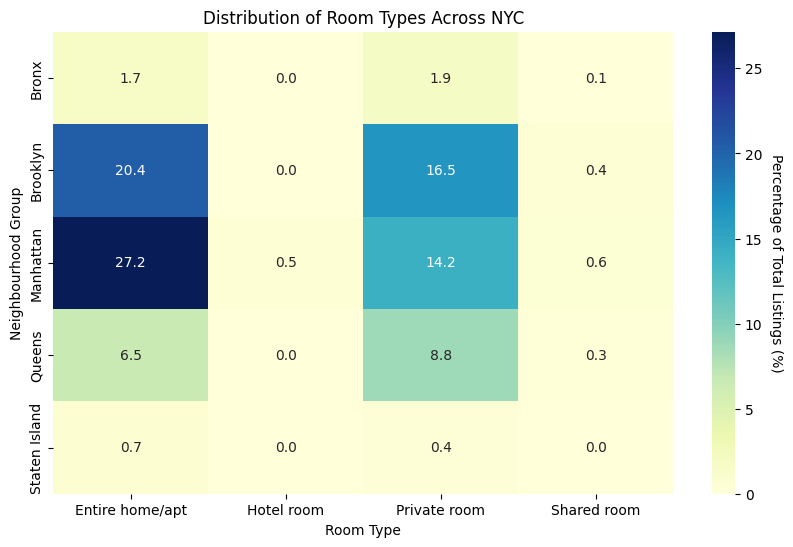

In [22]:
# heatmap:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table to summarize the data
room_distribution = nyc.pivot_table(index='neighbourhood_group_cleansed', columns='room_type', aggfunc='size', fill_value=0)

# Calculate the total number of listings
total_listings = room_distribution.values.sum()

# Calculate the percentages
room_distribution_percentages = room_distribution / total_listings * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(room_distribution_percentages, annot=True, fmt='.1f', cmap='YlGnBu')

plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.title('Distribution of Room Types Across NYC')

# Get the colorbar from the Heatmap
cbar = heatmap.collections[0].colorbar

# Set the label for the colorbar
cbar.set_label('Percentage of Total Listings (%)', rotation=270, labelpad=15)

The heatmap offers guests valuable insights into the diverse range of room types available across New York City's neighborhoods. Each cell in the heatmap represents a combination of room type and neighborhood, with the presence of a mark indicating the count of listings with that specific room type in the corresponding neighborhood. The x-axis denotes different room types, while the y-axis represents neighborhood groups, offering spatial organization for identifying room type distribution. The color of each cell encodes the count of listings, with darker shades indicating higher counts and lighter shades representing lower counts, facilitating quick perception of room type frequencies. Numeric annotations within cells provide precise quantitative information, supplementing the visual encoding with exact counts of listings.

The heatmap reveals the prevalence of different accommodation types across neighborhoods, with entire homes/apartments dominating in Manhattan, followed by Brooklyn and Queens. It also highlights the popularity of private rooms in Brooklyn, followed bt Manhattan and Queens. This information helps guests align their accommodation preferences with neighborhood offerings, facilitating informed decisions tailored to their needs and budget constraints.

### Interactive Scatterplot: Price vs. Number of Reviews


In [23]:
# Select a random sample of 5000 rows
nyc_sample = nyc.sample(5000)

# Only select listings with prices less than $3,000
subset_nyc_sample = nyc_sample[nyc_sample['price'] < 3000]

# Setup dropdown menu
options = [None, 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room']
labels = ['All', 'Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

custom_color_map = alt.Scale(domain=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
                              range=['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c'])

input_dropdown = alt.binding_radio(options = options,
                                    labels = labels,
                                    name = 'Room Type: ')

selection = alt.selection_point(fields = ['room_type'], bind = input_dropdown)

scatter_plot = alt.Chart(subset_nyc_sample).mark_circle().encode(
    x=alt.X('price:Q', title='Price ($)'),
    y=alt.Y('number_of_reviews:Q', title='Number of Reviews'),
    color=alt.Color('room_type:N', scale=custom_color_map)
).properties(
    title='Price vs. Number of Reviews for NYC Airbnbs (Prices < $3,000)',
    width=600,
    height=400
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
).add_params(
    selection
).transform_filter(
    selection
)

scatter_plot
# scatter_plot.save('scatter_altair.html')


alt.Chart(...)

In the interactive scatter plot below, we illustrate the relationship between price and the number of reviews for a random sample of 5,000 listings. To enhance clarity, we capped the price at under $3,000, as the majority of listings fell within the lower price range of $0 to $200. However, there were a few high-price outliers around $5,000, which could obscure the chart's readability. Each circle on the plot represents a listing, positioned based on its price and number of reviews. These circles are color-coded to denote different room types.

This scatterplot enables customers to evaluate listing value and popularity by correlating price with review counts. Additionally, our interactive tool allows users to select their preferred room type, dynamically scaling the chart to display only listings of that type. This feature provides users with a clearer view of the general price and review distribution for a specific room type.

Despite our analysis, we found no clear correlation between price and the number of reviews, with variations observed across different room types. However, the color coding facilitates users in finding accommodations that align with their preferences and needs, aiding them in making informed decisions.

### Interactive Scatterplot: Various Review Score Attributes


In our dataset, we found that Airbnb listings are evaluated on various subattributes like location, cleanliness, and check-in process, which contribute to the overall review score. Our interactive scatter plot provides a comprehensive overview of overall review scores across NYC, allowing users to explore individual subattributes. Positioned similarly to a geographical map, each circle represents a listing's location based on latitude and longitude. The color of each point corresponds to the displayed review score attribute, with darker shades indicating higher scores and lighter shades indicating lower scores on a scale of 1 to 5. This color scheme aids users in quickly identifying listings with lower scores amidst the majority of higher-scored listings.

Moreover, users can utilize the dropdown menu at the top of the plot to select their preferred subattribute for analysis. This feature enables users to explore the distribution of review scores based on specific criteria, empowering them to make more informed decisions when choosing accommodations.

#### *Code for the D3.js plot can be found in the main.js file*